In [1]:
from __future__ import division
from __future__ import print_function
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx as nx
from sympy.solvers import solve
from sympy import Symbol

In [2]:
from numpy.random import randn
import scipy.stats as stats
from scipy.optimize import brentq

np.random.seed(12345)
# Set inline figure size 
plt.rc('figure', figsize=(12, 8))
np.set_printoptions(precision=4)

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import pandas_datareader.data as web
import datetime
from IPython.display import Image
#%load_ext rpy2.ipython

# FINM8006 Advanced Investment 
## Risk and Expected Utility
---
Qiaoqiao Zhu   
Australian National University
_________

If you go to a job interview and are presented with two job options
* Option 1: \$50, 000 with probability $\frac{1}{2}$ and \$100,000 with prob $\frac{1}{2}$
* Option 2: \$X with prob 1.
    * If $X=\$75,000$, which option would you chose?
    * What is the least amount of money that make you prefer option 1?

In [3]:
%%html
<iframe src="http://www.nytimes.com/2016/01/13/us/powerball-odds.html?_r=0" width="800" height="600"></iframe>

## The Need for Utility (I)
### Preference Ordering

#### State by State Dominance

Consider a world of only two future states with equal probability. The payoffs are:
    
|  |Investment       | s=1   | s=2  |
|-------------------|-------|------|
|Investment 1 | -1000 | 1050  | 1200 |
|Investment 2 | -1000 | 500   | 1600 |
|Investment 3 | -1000 | 1050  | 1600 |

* investment 3 state by state dominates 1 and 2
* incomplete ordering between investment 1 and 2

#### Mean-Variance Dominance

returns of the same investments are:

|          | R(s=1)   | R(s=2)   | $E(R)$    |  $ \sigma$ |
|----------|----------|---------|------------|----------|
|Investment 1 | 5 %   | 20 %  | 12.5 % | 7.50 % |
|Investment 2 | -50 % | 60 %  | 5 %   | 55 % |
|Investment 3 | 5 %   | 60 %  | 32.5 % | 27.50 % |

* Investment 1 mean-variance dominates 2
* but, Investment 3 does not mean-variance dominates 1!

## The Need for Utility (II)
### St. Petersburg paradox

Bernoulli (1728)

consider the following gamble: you pay a fixed fee to enter and then a fair coin is tossed repeatedly until a tail appears, ending the game. You win \$1 if a tail appears on the first toss, \$2 if a head appears on the first toss and a tail on the second, \$4 if a head appears on the first two tosses and a tail on the third, \$8 if a head appears on the first three tosses and a tail on the fourth, etc. In short, you win \$$2^{k-1}$ dollars if the coin is tossed $k$ times until the first tail appears. How much would you be willing to pay to enter the gamble?


Expected payoff from the game is:
\begin{equation*}\frac{1}{2}1+\frac{1}{4}2+\frac{1}{8}4+\cdots =
\sum_{k}^{\infty}\frac{1}{2}=\infty\end{equation*}

* A player should almost surely come out ahead in the long run, one should therefore play the game at any price if offered the opportunity!
* But most people won't. It suggests expected payoff itself may not be a good measure for risk. 

## Utilities and Preferences
----

### Utility Function
Utility function $U: x\subset \mathbf{R^{n}} \rightarrow \mathbf{R^{1}}$ is a mapping representing ordered preferences
 * $U$ is a utility function iff $$\forall x_{1}, x_{2} \in x \quad x_{1}\succcurlyeq x_{2}\text{ iff }u(x_{1})\geq u(x_{2})\text{.} $$
 * The preference is *rational* if
    * Completeness: $\forall x,y \in \mathbf{x}$, we have $x\succcurlyeq y$ or $x\preccurlyeq y$ or $x\sim y$.
    * Transitivity: $\forall x,y,z\in \mathbf{x}$, if $x\succcurlyeq y$ and $y\succcurlyeq z$, then $x\succcurlyeq z$.
 * this allows us to link decision making to optimal outcomes

#### Some Assumptions on $U(x)$
* $\mathbf{C^2}$: continuous and twice differentiable
* (Quasi)-Concave:  $\text{If } x,y \in \mathbf{x}$, then
$$U(\alpha x+(1-\alpha)y) \geq \alpha U(x)+(1-\alpha)U(y), \forall \alpha \in (0,1) $$
   * It means indifference curve is convex

#### Indifference Curve
Indifference curve is the level curve of utility function
* Same utility on an indifference curve
* $\frac{\partial U/\partial X_{1}}{\partial U/\partial X_{2}}$ is the marginal rate of substitution: 

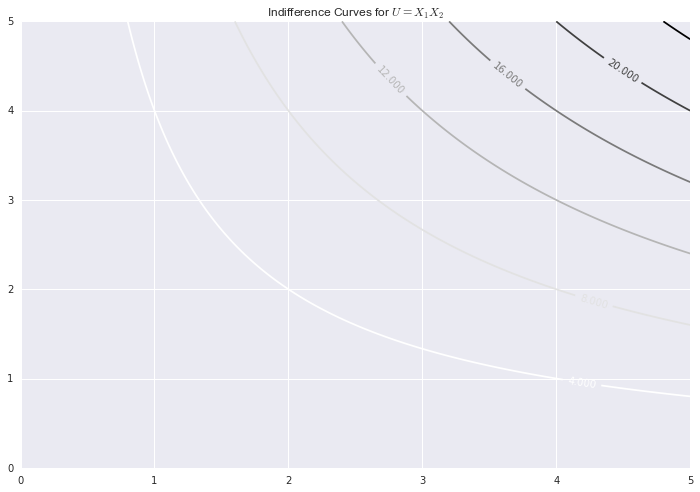

In [33]:
fig, ax = plt.subplots()
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X*Y
cs = plt.contour(X, Y, Z)
plt.clabel(cs, cs.levels, inline=True, fontsize=10)
#plt.legend()
plt.title('Indifference Curves for $U=X_{1}X_{2}$')
plt.show()

Consider now a world of many states, utility can then be defined over many states:
$$ (c_{1} \cdots c_{S}) \succcurlyeq (c'_{1} \cdots c'_{S}) \quad \text{ iff } \quad U((c_{1} \cdots c_{S}) )\geq U(c'_{1} \cdots c'_{S}) \text{.} $$

We have utility defined over S-dimension space (there S+1 in total). Wouldn't it be nice if we can simply utility representaion to space with one dimension -- e.g., wealth?

#### Lottories 
A lottery is a probability distribution, $\left\{p_{s}\right\}_{s\in S}$ such that $p_{s}>=0$ and $\sum p_{s}=1$

#### Independence of Preference over Lottories

It turns out we need an additional assumption: Two gambles mixed with a third one maintain the same preference order as when the two are presented independently of the third one.

$$\forall \text{ lottery } x, y, z, \text{and }\alpha\in (0,1) $$
$$ \text{If } x\sim y \text{, then } \alpha x+(1-\alpha)z \sim \alpha y+(1-\alpha)z $$



##### Allais Paradox

In the following example, if $ B \succcurlyeq A $ and $D \preccurlyeq C$, it's a violation of Independence Axiom

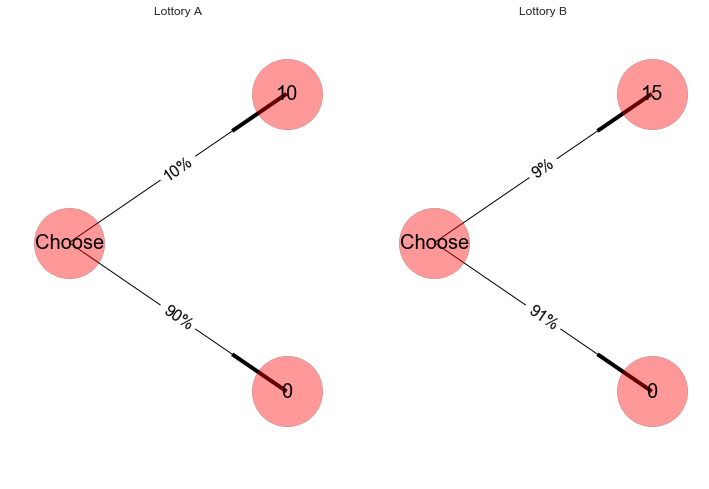

In [47]:
G=nx.DiGraph()
G.add_edges_from([(1,2),(1,3)])
fixed_positions = {1:(0,0),2:(1,2), 3:(1,-2)} #dict with two of the positions set
fixed_nodes = fixed_positions.keys()
pos=fixed_positions
node_labels = {1:'Choose', 2:'10', 3:'0'}
edge_labels = {(1,2): '10%', (1,3): '90%'}

fig, ax = plt.subplots()
plt.subplot(121)
nx.draw_networkx_nodes(G,pos, alpha=0.4, node_size=5000)
# edges
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos, alpha=0.5,labels=node_labels,font_size=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=16)
plt.title('Lottory A')
plt.axis('off')

plt.subplot(122)
node_labels2 = {1:'Choose', 2:'15', 3:'0'}
edge_labels2 = {(1,2): '9%',  (1,3): '91%' }
nx.draw_networkx_nodes(G,pos, alpha=0.4, node_size=5000)
# edges
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos, alpha=0.7,labels=node_labels2,font_size=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels2, font_size=16)
plt.title('Lottory B')
plt.axis('off')

plt.show()

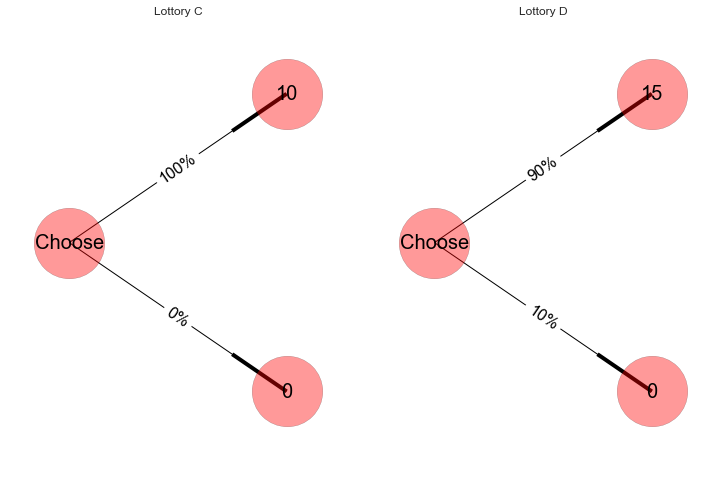

In [62]:
G=nx.DiGraph()
G.add_edges_from([(1,2),(1,3)])
fixed_positions = {1:(0,0),2:(1,2), 3:(1,-2)} #dict with two of the positions set
fixed_nodes = fixed_positions.keys()
pos=fixed_positions
node_labels = {1:'Choose', 2:'10', 3:'0'}
edge_labels = {(1,2): '100%', (1,3): '0%'}

fig, ax = plt.subplots()
plt.subplot(121)
nx.draw_networkx_nodes(G,pos, alpha=0.4, node_size=5000)
# edges
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos, alpha=0.5,labels=node_labels,font_size=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=16)
plt.title('Lottory C')
plt.axis('off')

plt.subplot(122)
node_labels2 = {1:'Choose', 2:'15', 3:'0'}
edge_labels2 = {(1,2): '90%',  (1,3): '10%' }
nx.draw_networkx_nodes(G,pos, alpha=0.4, node_size=5000)
# edges
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos, alpha=0.7,labels=node_labels2,font_size=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels2, font_size=16)
plt.title('Lottory D')
plt.axis('off')

plt.show()

If we mix lottory C and D with another lottory ($\alpha=10\%$), we get lottory A and B. But $ A \succcurlyeq B$, that's in contradition to  $C \preccurlyeq D$. 

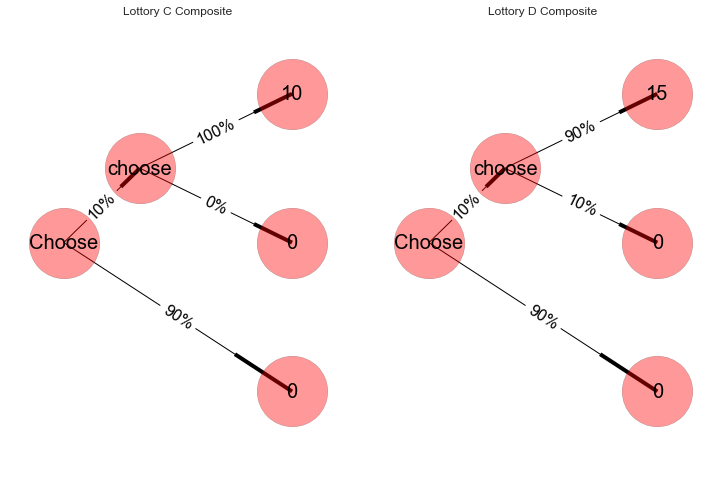

In [63]:
G=nx.DiGraph()
G.add_edges_from([(1,2),(1,3), (2, 4), (2,5)])
fixed_positions = {1:(0,0),2:(1,1), 3:(3,-2), 4:(3, 2),5:(3, 0)} #dict with two of the positions set
fixed_nodes = fixed_positions.keys()
pos=fixed_positions
node_labels = {1:'Choose', 2:'choose', 3:'0', 4:'10', 5:'0' }
edge_labels = {(1,2): '10%', (1,3): '90%', (2,4): '100%', (2,5): '0%'}

fig, ax = plt.subplots()
plt.subplot(121)
nx.draw_networkx_nodes(G,pos, alpha=0.4, node_size=5000)
# edges
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos, alpha=0.5,labels=node_labels,font_size=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=16)
plt.title('Lottory C Composite')
plt.axis('off')

plt.subplot(122)
node_labels2 = {1:'Choose', 2:'choose', 3:'0', 4:'15', 5:'0' }
edge_labels2 = {(1,2): '10%', (1,3): '90%', (2,4): '90%', (2,5): '10%'}
nx.draw_networkx_nodes(G,pos, alpha=0.4, node_size=5000)
# edges
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos, alpha=0.7,labels=node_labels2,font_size=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels2, font_size=16)
plt.title('Lottory D Composite')
plt.axis('off')

plt.show()

### Expected Utility 

If the preference $\succcurlyeq $ on a lottery (probability distribution), $\left\{p_{s}\right\}_{s\in S}$ satisfies completeness, continuity, transitivity and independence, then there exists expected utility representation of preference, i.e.,
$$L_{a}\preccurlyeq L_{b} \Leftrightarrow \sum_{S}p_{s}^{a}u_{s}\leq\sum_{S}p_{s}^{b}u_{s}$$

#### Jensen's Inequality

recall concavity assumption of utility function $$ \alpha U(x)+(1-\alpha)U(y)\leq U(\alpha x+(1-\alpha)y) $$ or $$ U^{\prime\prime}(x)\leq 0 $$
This Implies $$ E[U(x)]\leq U(E[x]) \quad \text{ iff } \quad U(\cdot) \text{ concave}$$

In [4]:
def u(w, gamma):
    return w**(1-gamma)/(1-gamma)
    
def Expu(a, b, proba, gamma):
    return proba*u(a, gamma)+(1-proba)*u(b,gamma)

def uplot(gamma=2, drawexp=True, low=40000, high=100000):
    w = np.linspace(10000, 200000, 200)
    plt.plot(w, u(w,gamma), label='Expected Utility Curve with $\gamma=%.1f$' %gamma )
    if drawexp:
        a=low
        b=high
        x = np.linspace(a, b, 50.)
        proba = 1-(x-a)/(b-a)
        y=Expu(a, b, proba, gamma)
        plt.plot(x, y, linestyle='--', label='Expected Utility of U(%i) and U(%i)'  %(low, high))
        plt.legend(loc='lower right')
    plt.title('Concave Expected Utility Curve')
    plt.ylabel('Utility')
    plt.xlabel('Wealth')
    plt.legend(loc='lower right')
    plt.xlim(10000, 200000)
    plt.show()

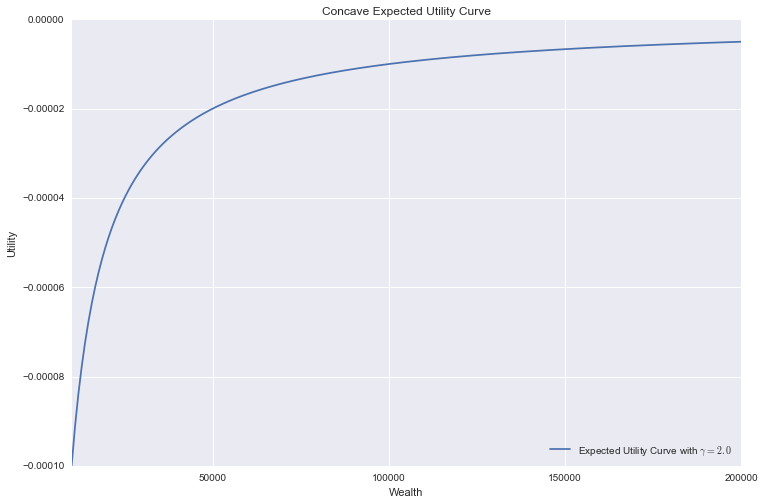

In [10]:
uplot(drawexp = False)

Drawing a line connecting any two points on the curve (E(U)) will be below the curve (U(E(W))

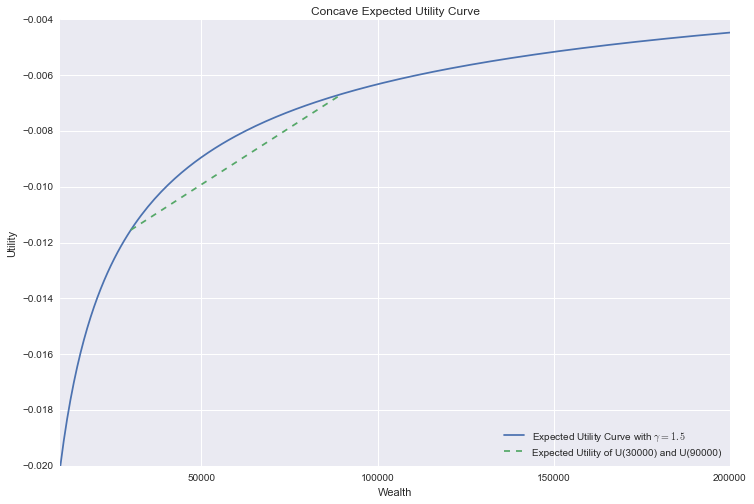

In [92]:
uplot(gamma=1.5, drawexp=True, low=30000, high=90000)

#### Risk Aversion

A consumer with utility function over wealth $u(w)$ is risk averse if he dislikes all **zero-mean risk** at all levels of wealth, i.e.,
    $$\forall w_{0}, \tilde{a} \text{ with } E(\tilde{a})=0 \qquad E[u(w_{0}+\tilde{a})] \leq u(w_{0}) $$ or equivalently
    $$ E[U(\tilde{x})]\leq U(E[\tilde{x}]) \text{ where } \tilde{x}=w_{0}+\tilde{a} $$
* $$\text{Risk aversion} \Leftrightarrow \text{concave utility} \Leftrightarrow u^{\prime \prime}\leq 0 $$


#### Risk Premium
the risk premium $\pi$ is the amount the consumer is willing to pay to avoid a zero-mean (pure) risk:
$$E[U(W_{0}+\tilde{a})]=U(W_{0}-\pi) $$
* LHS is the uncertainty case, RHS is the certainty case. 
* $u_{1}$ is more risk averse than $u_{2}$ then $\pi_{1}\geq \pi_{2}$. $W_{0}-\pi$ is also called certainty equivalence (note: adjust accordingly for non-zero-mean risk)

Let's say your expected utility is 

$$ \frac{W^{1-\gamma }}{1-\gamma}  $$

where $\gamma = 1.5$, your initial wealth is 60,000, 
your choice is 30,000 or 90,000 with half half probability.

In [14]:
def uplot2(gamma=1.5, low=30000, high=90000):
    fig, ax = plt.subplots()
    w = np.linspace(10000, 200000, 200)
    plt.plot(w, u(w,gamma), label='Expected Utility Curve with $\gamma=%.1f$' %gamma )
    a=low
    b=high
    x = np.linspace(a, b, 50.)
    proba = 1-(x-a)/(b-a)
    y=Expu(a, b, proba, gamma)
    plt.plot(x, y, linestyle='--', label='Expected Utility of U(%i) and U(%i)'  %(low, high))
    # annotate w0, proba=0.5
    alpha = 0.5
    w0 = (low+high)/2.
    uw0 = u(w0, gamma)
    expu = Expu(low, high, alpha, gamma)
    ax.get_yaxis().set_ticks([])
    ax.get_xaxis().set_ticks([])
    w_c = Symbol('w_c')
    w_ce = solve(w_c**(1-gamma)/(1-gamma) -expu, w_c)[0]

    print('Certainty Equivalent Wealth:', w_ce)
    print('RIsk Premium:', w0 - w_ce)

    ylim0 = plt.ylim()[0]
    xlim0 = plt.xlim()[0]
    plt.hlines(y=uw0, xmin=xlim0, xmax=w0, linestyle=':')
    plt.vlines(x=w0, ymin=ylim0, ymax=uw0, linestyle=':')
    plt.hlines(y=expu, xmin=xlim0, xmax=w_ce, linestyle=':')
    plt.vlines(x=w_ce, ymin=ylim0, ymax=expu,  linestyle=':')
    plt.text(xlim0, uw0, r'$U(W_{0})$')
    plt.text(xlim0, expu, r'$E(U(\tilde{W}))$')
    plt.text(w0, ylim0, r'$W_{0}$')
    plt.text(w_ce, ylim0, r'$W_{CE}$')
    
    plt.legend(loc='lower right')
    plt.title('Concave Expected Utility Curve')
    plt.ylabel('Utility')
    plt.xlabel('Wealth')
    plt.legend(loc='lower right')
    plt.xlim(10000, 200000)
    plt.show()

Certainty Equivalent Wealth: 48230.8546376021
RIsk Premium: 11769.1453623979


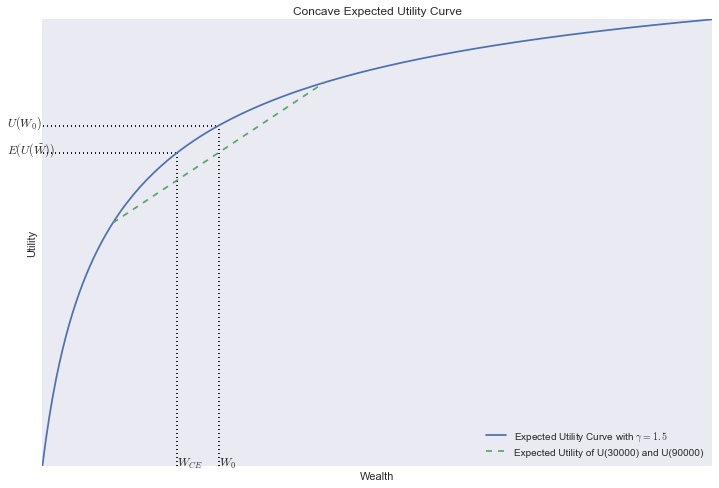

In [15]:
uplot2(gamma=1.5, low=30000, high=90000)

In [13]:
eu = (u(30000, 1.5) + u(90000,1.5))/2
eu

-0.009106836025229591

In [15]:
w_c = Symbol('w_c')
ce = solve(w_c**(1-1.5)/(1-1.5) -eu, w_c)[0]
ce

48230.8546376021

In [16]:
print('RIsk Premium:', 60000 - ce)

RIsk Premium: 11769.1453623979


Again, here's how we solve for $\pi$ in this example:
$$ E[U(\tilde a)] = 0.5U(30000)+0.5U(90000) $$
$$ U(W_{ce}) = E[U(\tilde a)] \Rightarrow W_{ce} $$
$$\pi = 60000-W_{ce}$$

Certainty Equivalent Wealth: 45000.0000000000
RIsk Premium: 15000.0000000000


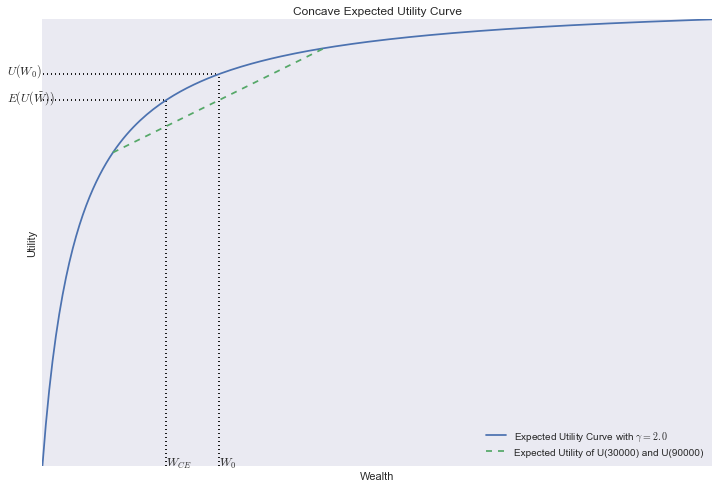

In [16]:
uplot2(gamma=2, low=30000, high=90000)

Clearly, risk premium changes when utility function and curvature changes. So, how can we characterize risk aversion wrt utility function?

#### Measureing Risk Aversion (Pratt-Arrow approximation)

How can we get a measure of risk aversion? That is, how much $\pi$ changes when $\tilde{a})$ change in 

$$E[U(W_{0}+\tilde{a})]=U(W_{0}-\pi) $$

Paratermize risk premium as $\pi=g(k)$, where k is the unit of some base risk. The risk on the LHS then defined as $\tilde{y}=k\tilde{a}$, $\tilde{a}$ is a pure risk. We then have 
   $$ E[U(w_{0}+k\tilde{a})]=U(w_{0}-g(k)) $$

Now let's take a Taylor-approximation of $g(k)$ around k equals zero:
$$g(k) = g(0)+kg^{\prime}(0)+\frac{1}{2}k^{2}g^{\prime\prime}(0)+o(k^{n})$$

$g(0)=0$ because $ E[U(w_{0})]=U(w_{0}=U(w_{0}-g(0))$. $g'(0)=0$ because 
Differentiate equation in k
$$E[\tilde{a}U^{\prime}(w_{0}+k\tilde{a})] =U^{\prime}(w_{0}+k\tilde{a})E[\tilde{a}] =-g^{\prime}(k)U^{\prime}(w_{0}-g(k))$$


Differentiate in k again
$$E[\tilde{a}^{2}U^{\prime\prime}(w_{0}+k\tilde{a})]=-g^{\prime\prime}(k)U^{\prime}(w_{0}-g(k))+g^{\prime}(k)^{2} U^{\prime\prime}(w_{0}-g(k))$$
evaluate at $k=0$
$$U^{\prime\prime}(w_{0})E[\tilde{a}^{2}]=-g^{\prime\prime}(0)U^{\prime}(w_{0})$$

$$ g^{\prime\prime}(0) = \frac{-U^{\prime\prime}(w_{0})}{U^{\prime}(w_{0})}E(\tilde{a}^{2})$$

Back to Tayler-approximation. 

$$\Rightarrow g(k)\equiv \pi \approx \frac{1}{2}k^{2}\frac{-U^{\prime\prime}(w_{0})}{U^{\prime}(w_{0})}E(\tilde{a}^{2})$$
$$= \frac{1}{2}\frac{-U^{\prime\prime}(w_{0})}{U^{\prime}(W_{0})}E(\tilde{y}^{2}) $$

Clearly, risk premium depends on two things: (1) the curveture of the utility curve, and (2) the riskiness of choices (i.e., how further apart they are). Formally...

#### Absolution Risk Aversion

$$ \pi \approx \frac{1}{2}A(w_{0})\sigma^{2} $$
where 
* $ A(w)\equiv\frac{-U^{\prime\prime}(w_{0})}{U^{\prime}(w_{0})}$ is called **Absolute Risk Aversion**, which is a function of wealth. 
* $\sigma^{2}=E(\tilde{y}^{2}) $ is the variance. 

Let $A$ be absolute risk aversion, $\pi$ be risk premium, $C^{e}$ be certainty-equivalence. Then the following statements are equivalent for utility $U_{1}$ and $U_{2}$:
* $A_{1} \geq A_{2}$
*  $\pi_{1}\geq \pi_{2}$
* $C^{e}_{1} \leq C^{e}_{2}$

#### Relative Risk Aversion

Similarly, let $\tilde{w}$ be multiplicative risk $\tilde{w}=w_{0}(1+k\tilde{a})$. Define $\check{\pi}$ to be the **share** of wealth that one would pay to avoid risk, then we can show 
$$ \check{\pi} \approx \frac{1}{2}k^{2}E(\tilde{a}^{2})w_{0}A(w_{0})= \frac{1}{2}R(w_{0})\sigma^2$$
 * $R(w_{0})\equiv \frac{-U^{\prime\prime}(w_{0})}{U^{\prime}(w_{0})}w_{0}$ is **relative risk aversion**. 

### Risk and Investment Choices

Consider investor choice between safe and risky asset. Investor allocates wealth $w$ in a safe asset with
return $r_{f}$ and a risky asset with excess return $r-r_{f}=\tilde{x}$. Final wealth is therefore
$w(1 + r_{f}) + \theta \tilde{x}$, where $\theta$ is *dollar* amount invested in risky asset. What is optimal $\theta$?

for convenience, let's define $w_{0}\equiv (1+r_{f})w $. Investors solve
$$ \max_{\theta}V(\theta)= Eu(w_{0}+\theta \tilde{x}) $$
$$ FOC: V'(\theta^{*})=E[\tilde x u'(w_{0}+\theta^{*} \tilde x)]=0 $$
$$ V^{\prime\prime}(\theta^{*})=E[\tilde{x}^{2}u^{\prime\prime}(w_{0}+\theta^{*} \tilde{x})] <0 \text{ for concave u}$$

so we know have $E[\tilde{x}u'(w_{0}+\theta^{*} \tilde{x})]$ decreasing in $\theta$. Let's evaluate FOC at $\theta=0$.   
$$V'(0)=E[\tilde{x}u'(w_{0})]= u'(w_{0})E(\tilde{x})$$. Since $u'(w_{0})>0$, $V'(0)$ is the same sign as $E(\tilde{x})$.

#### Principle of participation
* Investment in risky asset should be positive if has a positive expected return. This holds for any level of risk aversion.
* That is , when $E(\tilde{x})>0$, increase $\theta$ from 0, so that $V'()$ can be lowered to satisfy FOC. 
* What's the empirical evidence?

#### Small Risk Property

$\theta^*$ is difficult to solve in general without functional form of $U(.)$. But let's look at how $\theta^*$ relate to $E(\tilde{x})$ with small risk by taylor series approximations. Let $\tilde{x}=k\mu+\tilde{y}$, with $k>0$ and $E(\tilde{y})=0$, and study $\theta^{*}$ around $k=0$.

By FOC
 $$ E[(k\mu+\tilde{y})U'(w_{0}+ \theta^{*}(k)(k\mu+\tilde{y})]=0 $$
 Differentiating in $k$ and call the term inside $U'$, $\tilde{w}$
 $$E [\mu U'(\tilde{w})+ (k\mu+\tilde{y})U''(\tilde{w})(\theta'^{*}(k)(k\mu+\tilde{y}) + \theta^{*}(k)\mu ) ]=0 $$

Evaluate this at $k=0$ and recall $\theta^*(0)=0$, we have
$$ \theta^{*'}(0)=\dfrac{-\mu U'}{E\tilde{y}^{2}U''} =\dfrac{\mu}{E\tilde{y}^{2}} \frac{1}{A(w_{0})} $$

$$ \theta^{*}(k) = \theta^{*}(0) +k\theta^{*'}(0)=\frac{ku}{E\tilde{y}^{2}} \frac{1}{A(w_{0})}=\frac{E\tilde{x}}{E(\tilde{x}-E\tilde{x})^{2}} \frac{1}{A(w_{0})} $$
and relative share of risky asset is 
$$ a^*(k) = \dfrac{\theta^*(k)}{w_0} = \dfrac{E\tilde{x}}{E(\tilde{x}-E\tilde{x})^{2}} \dfrac{1}{R(w_{0})}$$

Invest more if
    
* Mean return $E\tilde{x}$ is high
* Variance of return $E(\tilde{x}-E\tilde{x})^{2} $ is low
*  Risk aversion  is low. (Wealth possibly affect the decision through risk aversion.)


#### Common utility functions
* Quadratic utility: $u(x)=ax-\frac{c}{2}x^{2}$. 
     - Implies increasing $A(w)$
* Power utility: \begin{equation*}
u(x)=\left\{\begin{array}{l}x^{1-\gamma }/(1-\gamma ) \\
\ln (x)\end{array}
\begin{array}{l}
\text{if }\gamma \neq 1 \\
\text{if }\gamma =1\end{array}
\text{ }\right.
\end{equation*}
    - constant $R(w)=\gamma$ (CRRA), implies stationary risk premium. Tractable with multiplicative, log-normal risk.
* Exponential Utility: $u(x)=1-e^{-\alpha x}$. 
    - Implies constant $A(w)=\alpha$ (CARA) and increasing $R(w)$. 

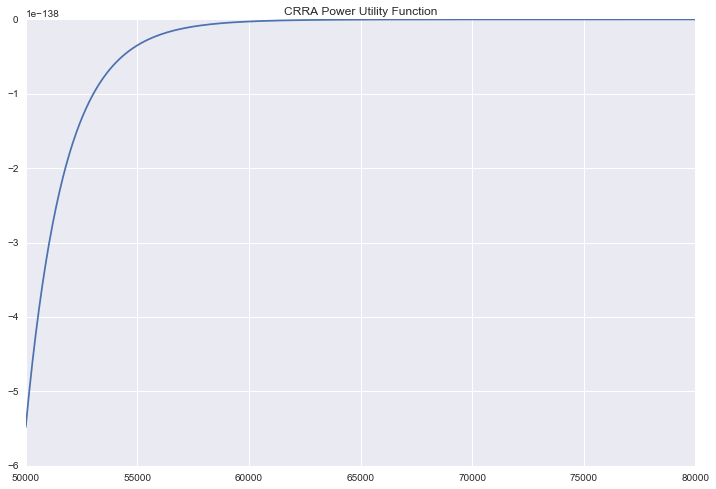

In [3]:
def uplot(gamma):
    w = np.linspace(50000, 80000, 200)
    u = (w**(1-gamma))/(1-gamma)
    fig = plt.figure()
    plt.plot(w, u)
    plt.set_xlim=([50000, 80000])
    plt.set_ylim=([-1.2, 0])
    plt.title('CRRA Power Utility Function')
    plt.show()
interact(uplot, gamma=(1.1, 30)); 

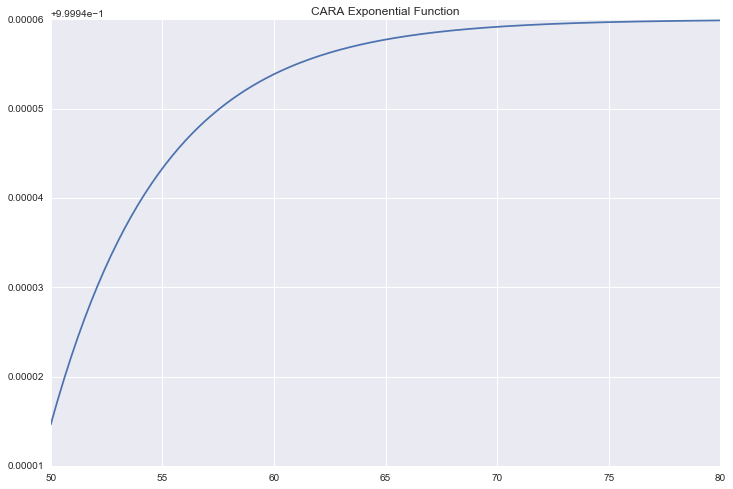

In [4]:
def uplotcar(a):
    w = np.linspace(50, 80, 200)
    u = 1-np.exp(-a*w)
    fig = plt.figure()
    plt.plot(w, u)
    plt.title('CARA Exponential Function')
    plt.show()
    
#uplotcar(0.5)
interact(uplotcar, a=(0.1, 0.8)); 

We can now use CRRA function to simulate the investment choice problem and see if simulation and analytical solutions agree. 

Stock allocation for Maximum Expected Utility: 34742.474916.


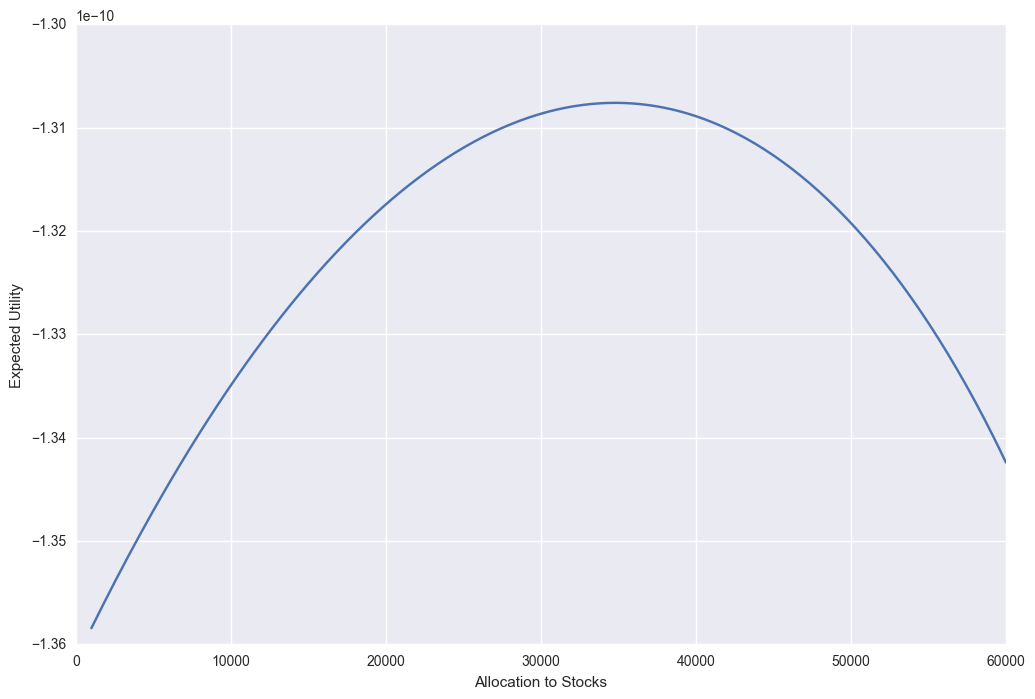

In [6]:
def u(w, gamma):
    return w**(1-gamma)/(1-gamma)

def fw(s):
    return w0*(1+rf)+s*r

sigma=0.2
mu=0.07
rf=0.01
s=np.linspace(1000,60000, 300)
w0=60000

r = sigma * np.random.randn(2000, 3000) + mu # multidimention random normal, can only use one dimension
mexpu=[]
for item in s:
    ut = u(fw(item), 3)
    expu = ut.mean(axis=1)
    m = expu.mean(axis=0)
    mexpu.append(m)
sim = pd.DataFrame(np.column_stack([s, mexpu]), columns=['share', 'exputility'])
print('Stock allocation for Maximum Expected Utility: %2f.' %sim.loc[sim.exputility.argmax(), 'share'])
fig = plt.figure()
plt.plot(sim.share, sim.exputility)
plt.xlabel('Allocation to Stocks')
plt.ylabel('Expected Utility')
plt.show()

In [4]:
print('optimal allocation when mean=0.07, sigma=0.2, initial whealth=60000, and gamma=3')
print('60000*(0.07/sigma**2)/3= ', 60000*(0.07/sigma**2)/3)

optimal allocation when mean=0.07, sigma=0.2, initial whealth=60000, and gamma=3
60000*(0.07/sigma**2)/3=  35000.0


##### Implications of expected utility 

Expected utility theory implies people are approximately risk neutral to small risks!

##### Rabin's critique
* Many people reject small games such as $G_{s}=(550, \frac{1}{2};-500,\frac{1}{2})$ but accept large games such as $G_{L}=(20,000,000, \frac{1}{2};-10,000,\frac{1}{2})$ (Barberis, Huang, Thaler (AER 2006))
* Risk premium implied by the rejection of $G_{s}$ is large ($\gamma \geq 181$ for CRRA with \$1million wealth). But for that level of risk aversion, investor rejects $G_{L}$. No expected concave utility defined over wealth can explain both observations.

Back to the question at the beginning: What's your $\gamma$?

In [4]:
def fgamma(gamma, w0, ce):
    return (w0+ce)**(1.-gamma)/(1.-gamma) - 0.5*((w0+50000.)**(1.-gamma)/(1.-gamma)+(w0+100000.)**(1.-gamma)/(1.-gamma))

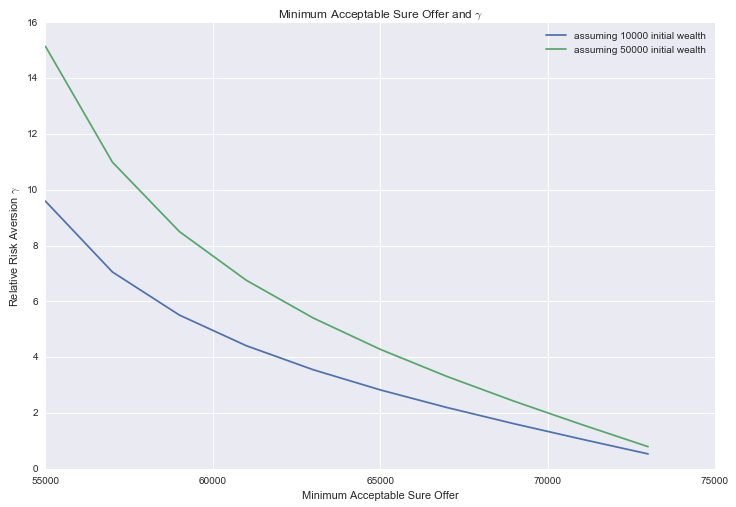

In [5]:
wrange =[10000, 50000]
crange = np.arange(55000, 75000, 2000)
glist = []
for ce in crange:
    gamma = brentq(fgamma, 0., 22, args=(wrange[0], ce))
    glist.append(gamma)
gamma = zip(crange, glist)
gplt = DataFrame(gamma)
gplt.columns = ['min', 'RA']

glist = []
for ce in crange:
    gamma = brentq(fgamma, 0., 22, args=(wrange[1], ce))
    glist.append(gamma)
gamma = zip(crange, glist)
gplt2 = DataFrame(gamma)
gplt2.columns = ['min', 'RA']

fig, ax = plt.subplots()
plt.plot(gplt['min'], gplt['RA'], label='assuming %i initial wealth' %wrange[0] )
plt.plot(gplt2['min'], gplt2['RA'], label='assuming %i initial wealth' %wrange[1] )
plt.title('Minimum Acceptable Sure Offer and $\gamma$')
plt.ylabel('Relative Risk Aversion $\gamma$')
plt.xlabel('Minimum Acceptable Sure Offer')
plt.legend()
plt.show()

## Stochastic Dominance

* Once the u-function is known, any pair of lotteries can be compared. 
* But Functional forms are tricky, we are often interested in making broader comparisons that are valid for very general classes of utility functions. 
* Stochastic dominance is an incomplete ordering that is not dependent on particular preferences.

Let $f_{i}(w)$ denote the probability density function (pdf) over random variable $w$ defined over interval $(a,b)$. $F_{i}(w)$ is then its cdf $\int_{a}^{w} f_{i}(w)dw$, $F_{i}(a)=0$ and $F_{i}(b)=1$.
$$ E[u(w_{i})]=\int_{a}^{b}u(w)f_{i}(w)dw $$
$$ = u(w)F_{i}(w)|_{a}^{b}-\int_{a}^{b}u^{\prime}(w)F_{i}(w)dw $$
$$ = u(b)-\int_{a}^{b}u^{\prime}(w)F_{i}(w)dw$$
   * Technical Note: integration by parts $ \int_{a}^{b}f(x)g'(x)dx = f(x)g(x)|_{a}^{b}- \int_{a}^{b}f'(x)g(x)dx $

#### First Order Stochastic Dominance
$$ E[u(w_{i})]=u(b)-\int_{a}^{b}u^{\prime}(w)F_{i}(w)dw $$
$$ E[u(w_{2})-u(w_{1})]=\int_{a}^{b}u^{\prime}(w)[F_{1}(w)-F_{2}(w)]dw $$
 * $ E[u(w_{2})]\leq E[u(w_{1})] \Leftrightarrow F_{1}(w) \leq F_{2}(w) \quad \forall w $
 *  $w_{1} \underset{FOSD}{\geq} w_{2} \text{ iff }  F_{1}(w) \leq F_{2}(w) \quad \forall w $ and inequality strictly hold for some $w$
 * Notice FOSD requires only $u(w)$ non-decreasing, i.e., $u'(w)\geq 0$

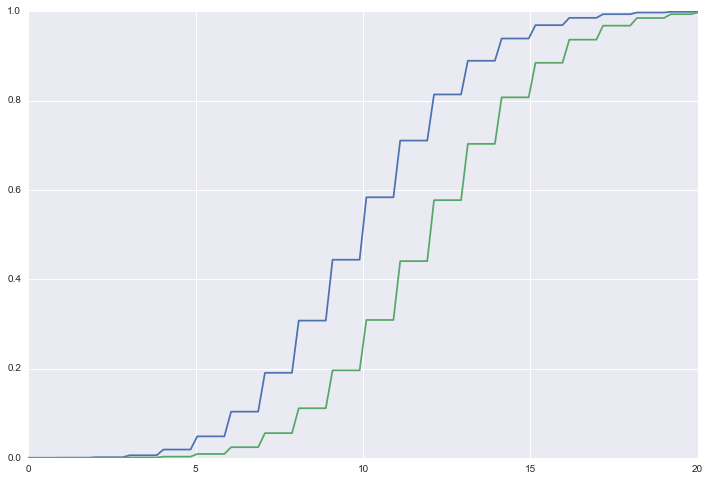

In [4]:
x = np.linspace(0,20,100)
cdf = stats.binom.cdf
plt.plot(x,cdf(x, 50, 0.2))
plt.plot(x,cdf(x, 40, 0.3))
plt.show()

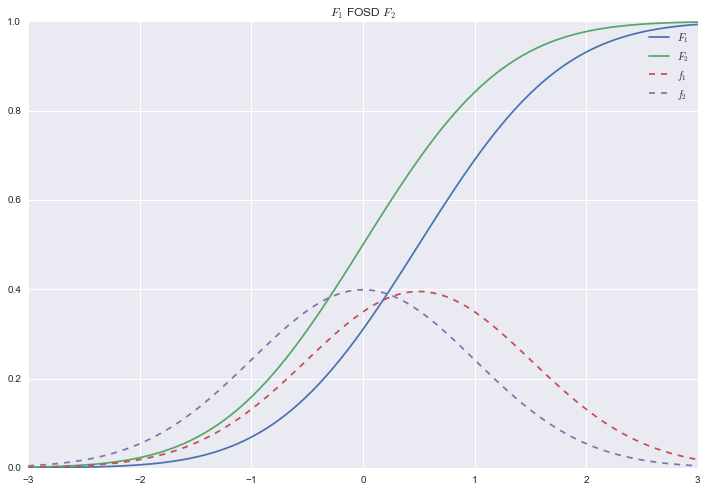

In [124]:
x = np.linspace(-3,3,100)
F1 = stats.norm.cdf(x, loc=0.5, scale=1.01)
F2 = stats.norm.cdf(x, loc=0, scale=1)
f1 = stats.norm.pdf(x, loc=0.5, scale=1.01)
f2 = stats.norm.pdf(x)
fig, ax = plt.subplots()
plt.plot(x, F1, label= r'$F_{1}$')
plt.plot(x, F2, label= r'$F_{2}$')
plt.plot(x, f1, label= r'$f_{1}$', linestyle = '--')
plt.plot(x, f2, label= r'$f_{2}$', linestyle = '--')
plt.title(r'$F_{1}$ FOSD $F_{2}$')
plt.legend()
plt.show()

Notice that $L_1$ do not necessary state-by-state dominate $L_2$. Example:

| State           | Prob  | $L_{1}$     |  $L_2$                         |
| ----------------|-------|--------------|-------------------------------|
|  $s_{1}$        |0.2    |  \$80          | \$10                        |
|  $s_{2}$        |0.3    |  \$30         |  \$50                        |
|  $s_{3}$        |0.1    | \$60          |  \$70                        |
| $s_{4}$       | 0.4     |  \$50         | \$30                         |

In [5]:
def L1cdf(x):
    if x< 30:
        return 0
    if 30 <=x <= 50:
        return 0.3
    elif 50<=x<=60:
        return 0.4+0.3
    elif 60<=x<80:
        return 0.1+0.4+0.3
    elif x>=80:
        return 1
    
def L2cdf(x):
    if x < 10:
        return 0
    elif 10<=x<30:
        return 0.2
    elif 30<=x<50:
        return 0.2+0.4
    elif 50<=x<70:
        return 0.2+0.4+0.3
    elif x>=70:
        return 1
    
def alternative():
    '''
x=range(100)
y=[]
for xs in x:
    ys = L1cdf(xs)
    y.append(ys)
fig = plt.figure()
plt.plot(x,y, label=r'$L_1$')


z=[]
for xs in x:
    zs = L2cdf(xs)
    z.append(zs)
plt.plot(x,z, label=r'$L_2$')
plt.legend()
plt.title('Lottory CDFs')
plt.show()
  '''
    return none

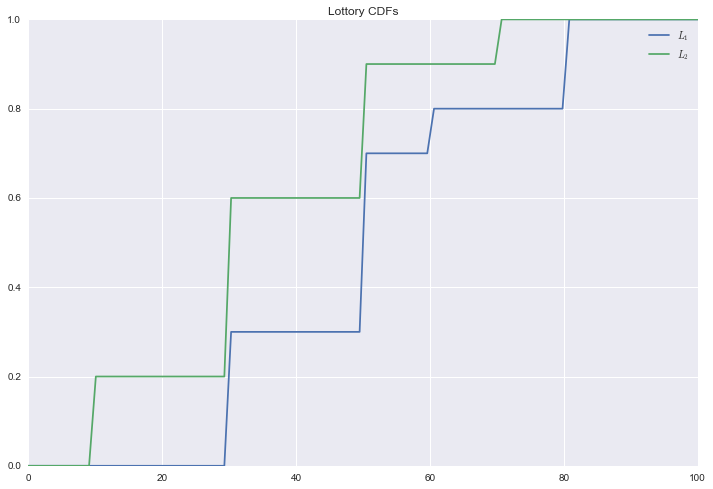

In [6]:
# use array iterater
x = np.linspace(0,100,100)
y = [L1cdf(xs) for xs in np.nditer(x)]
z = [L2cdf(xs) for xs in np.nditer(x)]
fig = plt.figure()
plt.plot(x,y, label=r'$L_1$')
plt.plot(x,z, label=r'$L_2$')
plt.legend()
plt.title('Lottory CDFs')
plt.show()

#### Second order stochastic dominance

$$ w_{1} \underset{SOSD}{\geq} w_{2} \text{ iff } \int_{a}^{w}F_{1}(w)dw <\int_{a}^{w}F_{2}(w)dw \quad \forall w\in (a,b)  \text{ and } E_{1}(w)=E_{2}(w) $$
* It can be derived by integrating again $E[u(w_{i})]=u(b)-\int_{a}^{b}u^{\prime}(w)F_{i}(w)dw$
* For $w_{1} \underset{SOSD}{\geq} w_{2}$, on the borderline, a risk-neutral person is indifferent between $w_{1}$ and $w_{2}$, thus $E_{1}(w)=E_{2}(w)$
* SOSD requires $u(w)$ to be concave, i.e., $u''(w)\leq0$

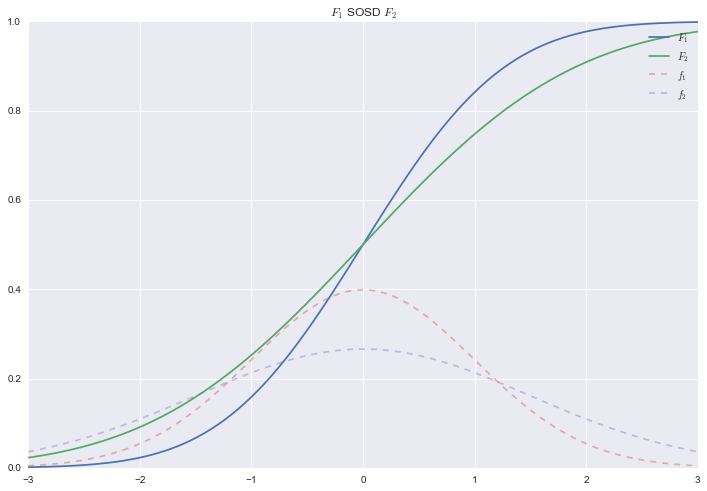

In [7]:
x = np.linspace(-3,3,100)
F1 = stats.norm.cdf(x, loc=0, scale=1)
F2 = stats.norm.cdf(x, loc=0, scale=1.5)
f1 = stats.norm.pdf(x, loc=0, scale=1)
f2 = stats.norm.pdf(x, loc=0, scale=1.5)
fig, ax = plt.subplots()
plt.plot(x, F1, label= r'$F_{1}$')
plt.plot(x, F2, label= r'$F_{2}$')
plt.plot(x, f1, label= r'$f_{1}$', linestyle = '--', alpha=0.4)
plt.plot(x, f2, label= r'$f_{2}$', linestyle = '--', alpha=0.4)
plt.title(r'$F_{1}$ SOSD $F_{2}$')
plt.legend()
plt.show()

##### Comparing Risks
Three possible notions of increasing risk:
   * Something that all concave utility functions dislike.
   * More weight in the tails of the distribution. (e.g., MPS)
   * Added noise. ($\tilde{Y}=\tilde{X}+\tilde{\epsilon}$ where $E[\tilde{\epsilon}|X]=0$ )

Rothschild \& Stiglitz shows that these are all equivalent. They are **not** equivalent to higher variance.


Why are these not equivalent to $\tilde{Y}$ having greater variance than $\tilde{X}$ ? It is
obvious that if $\tilde{Y}$ is riskier than $\tilde{X}$ then $\tilde{Y}$ has greater variance
than $\tilde{X}$. The problem is that the reverse is not true in general. Greater
variance is necessary but not sufficient for increased risk. $\tilde{Y}$ could have
greater variance than $\tilde{X}$ but still be preferred by some concave utility
functions if it has more desirable higher-moment properties (e.g. Skewness). This
possibility can only be eliminated if we concentrate attention to a limited class
of distributions such as the normal distribution.

## Concluding Remarks
 * We reviewed the building blocks of asset pricing theory, i.e., how preference (utility) is defined over risk (distribution).
 * It also gives us idea where the pricing models can be refined/extended
    * utility: both the variables and functional forms, e.g., habit formation
    * expected utility theory violations: This gives rise to ambiguity theory and most of behavioral finance, e.g., loss aversion, prospect theory.
    * market structure: how equilibrium is formed. E.g., AP under information asymmetry.

In [177]:
def u(w, gamma):
    return w**(1-gamma)/(1-gamma)

u(1e5, 2)>293e6*u(1.5*1e9, 2)+(1-293e6)*u(1e5-2, 2)

False